In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
path_to_data = '/Users/ktruong/workspace/Workspace/experiments/034_phylogenetic_placements/e_coli_experiment/phylo_placement/dist_matrix.csv'
distance_matrix = pd.read_csv(path_to_data, header=0,index_col=0,on_bad_lines='warn',low_memory=False)

In [3]:
distance_matrix.head()

,SAMEA3981674,SAMEA104418395,SAMEA3681638,SAMN06312197,SAMN07189536,SAMN09866837,SAMEA104146894,SAMN05966279,SAMEA3981986,SAMN05004262,...,SAMN05170836,SAMN05170686,SAMEA3697253,SAMEA4058497,SAMN03358807,SAMN10221353,SAMN04293390,SAMN08039398,SAMN10221248,SAMN10221010
ID,,,,,,,,,,,,,,,,,,,,,
SAMN07682653,0.022638,0.023526,0.025566,0.032936,0.028406,0.030677,0.031275,0.032511,0.028588,0.033804,...,0.021292,0.021850,0.019371,0.020412,0.018867,0.021292,0.021361,0.018867,0.018496,0.019118
SAMEA3980837,0.019886,0.022638,0.021155,0.029995,0.023678,0.030875,0.027956,0.030776,0.024448,0.033804,...,0.018252,0.018496,0.017831,0.018192,0.017301,0.018620,0.018930,0.016896,0.017594,0.018131
SAMN06018941,0.036941,0.039101,0.036819,0.045194,0.040310,0.047174,0.042437,0.048741,0.042880,0.050954,...,0.037187,0.037311,0.036575,0.036334,0.035157,0.037311,0.037187,0.035505,0.036095,0.036575
SAMEA4062373,0.020280,0.023004,0.022638,0.031886,0.025977,0.033150,0.028135,0.033584,0.027513,0.032936,...,0.017417,0.017891,0.016555,0.017126,0.016275,0.017594,0.018011,0.015454,0.016275,0.016443
SAMN06018965,0.021500,0.022420,0.022134,0.031579,0.025080,0.033043,0.028956,0.033804,0.028225,0.033804,...,0.017891,0.018192,0.016782,0.016164,0.016108,0.017951,0.018313,0.015670,0.016782,0.016725


In [4]:
min_of_queries = distance_matrix.idxmin(axis = 1)

In [5]:
grby_size = min_of_queries.groupby(min_of_queries).size()

In [6]:
references = pd.Series(0, index=distance_matrix.columns)

In [7]:
references.update(grby_size)

In [8]:
references.max(),references.mean()

(507, 7.9136)

In [9]:
references

SAMEA3981674       0
SAMEA104418395     0
SAMEA3681638       1
SAMN06312197       0
SAMN07189536       2
                  ..
SAMN10221353       1
SAMN04293390       4
SAMN08039398      24
SAMN10221248       2
SAMN10221010       2
Length: 10000, dtype: int64

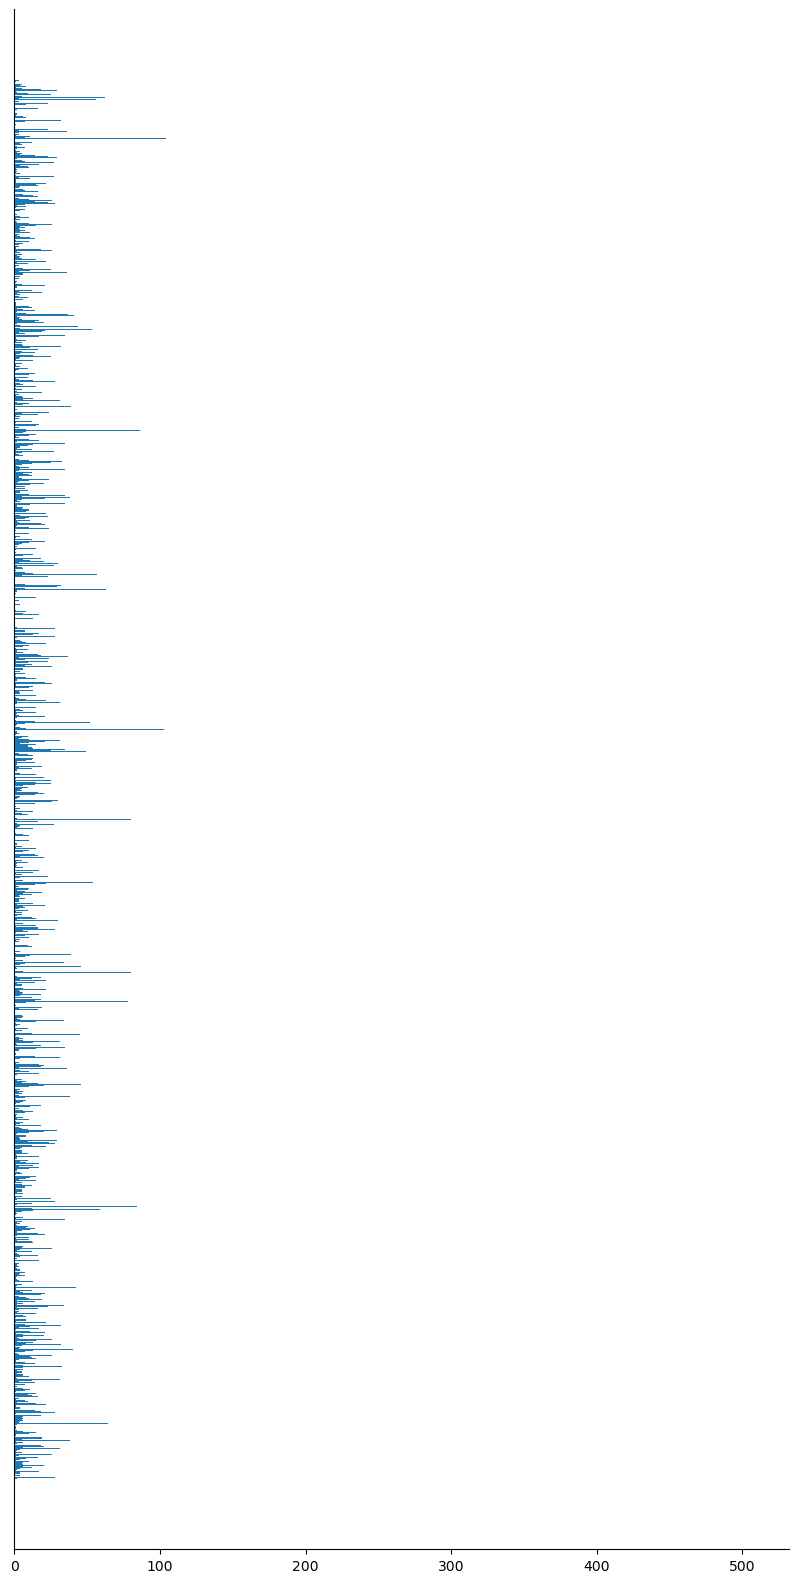

In [14]:
fig, ax = plt.subplots(figsize=(10, 20))

files = references.index[::-1]
sizes = references.values[::-1]
# bar_labels = ['red', 'blue', '_red', 'orange']
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

# ax.bar(files, counts, label=bar_labels, color=bar_colors)
ax.barh(files, sizes, height = 1)

ax.set_ylabel('')
ax.set_title('')
ax.set_xlabel('')
plt.yticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [11]:
grby_groups = min_of_queries.groupby(min_of_queries).groups

In [12]:
len(grby_groups)

7735

In [20]:
def write_list_to_file(filename, values):
    """
    Write a list of values to a text file, each value on a new line.
    
    :param filename: Path to the output file.
    :param values: List of values to write.
    """
    with open(filename, "w") as f:
        for value in values:
            f.write(f"{value}\n")

In [31]:
path_to_save = 'data/034_experiment_ecoli_backbone_min_map'
if not os.path.exists(path_to_save):
    os.mkdir(path_to_save)

In [32]:
for key in grby_groups.keys():
    print(key)
    values = [key]+list(grby_groups[key])
    write_list_to_file(f'{path_to_save}/{key}.txt',values)

SAMD00002695
SAMD00008647
SAMD00008980
SAMD00010118
SAMD00010820
SAMD00013262
SAMD00013286
SAMD00013340
SAMD00013357
SAMD00018478
SAMD00018707
SAMD00018736
SAMD00019012
SAMD00019024
SAMD00019030
SAMD00029119
SAMD00029127
SAMD00029140
SAMD00029180
SAMD00029185
SAMD00029228
SAMD00029233
SAMD00034540
SAMD00034544
SAMD00044950
SAMD00044955
SAMD00044975
SAMD00049266
SAMD00049285
SAMD00049296
SAMD00052631
SAMD00052660
SAMD00052665
SAMD00052668
SAMD00052670
SAMD00052672
SAMD00052681
SAMD00053079
SAMD00053097
SAMD00053113
SAMD00053141
SAMD00053179
SAMD00053193
SAMD00053194
SAMD00056881
SAMD00056902
SAMD00062405
SAMD00062407
SAMD00062420
SAMD00064343
SAMD00065705
SAMD00065960
SAMD00065990
SAMD00066641
SAMD00066649
SAMD00066666
SAMD00066679
SAMD00066716
SAMD00066725
SAMD00066730
SAMD00066743
SAMD00067421
SAMD00067427
SAMD00067430
SAMD00069768
SAMD00069772
SAMD00074174
SAMD00075950
SAMD00076224
SAMD00078335
SAMD00078337
SAMD00080505
SAMD00080512
SAMD00080526
SAMD00083804
SAMD00083836
SAMD00083863